Importing essential libraries and linking to data

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


CREATING, TRAINING AND TESTING CNN MODEL

Found 300 validated image filenames belonging to 2 classes.
Found 100 validated image filenames belonging to 2 classes.
Epoch 1/10
4/4 [==============================] - 1s 156ms/step - loss: 0.5005 - accuracy: 0.9100
Training accuracy: 0.5821
Validation accuracy: 0.9100
9/9 [==============================] - 64s 7s/step - loss: 0.7740 - accuracy: 0.5821 - val_loss: 0.5054 - val_accuracy: 0.9167
Epoch 2/10
4/4 [==============================] - 1s 157ms/step - loss: 0.2535 - accuracy: 0.8800
Training accuracy: 0.8785
Validation accuracy: 0.8800
9/9 [==============================] - 16s 2s/step - loss: 0.3790 - accuracy: 0.8785 - val_loss: 0.2570 - val_accuracy: 0.8750
Epoch 3/10
4/4 [==============================] - 1s 154ms/step - loss: 0.1085 - accuracy: 0.9800
Training accuracy: 0.8470
Validation accuracy: 0.9800
9/9 [==============================] - 12s 1s/step - loss: 0.3236 - accuracy: 0.8470 - val_loss: 0.1113 - val_accuracy: 0.9792
Epoch 4/10
4/4 [===========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


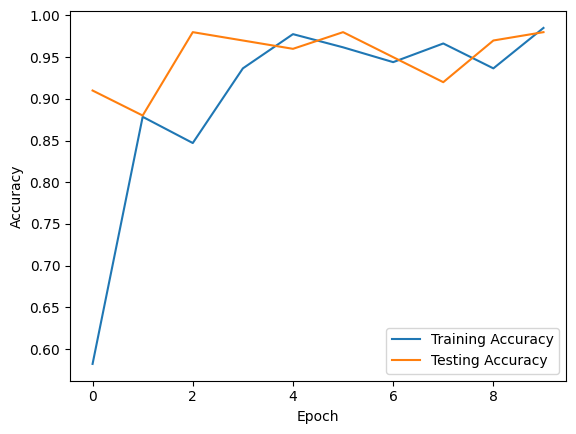

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

# Define directories
base_dir = '/content/drive/My Drive/SCH-MGNT 661/parking'
busy_dir = os.path.join(base_dir, 'busy')
free_dir = os.path.join(base_dir, 'free')

# Function to get random file paths from a directory
def get_random_files(directory, num_files):
    file_paths = []
    files = os.listdir(directory)
    random_files = np.random.choice(files, num_files, replace=False)
    for file in random_files:
        file_path = os.path.join(directory, file)
        file_paths.append(file_path)
    return file_paths

# Get random file paths for training and testing
num_train_samples = 300
num_test_samples = 100

train_busy_files = get_random_files(busy_dir, num_train_samples // 2)
train_free_files = get_random_files(free_dir, num_train_samples // 2)
test_busy_files = get_random_files(busy_dir, num_test_samples // 2)
test_free_files = get_random_files(free_dir, num_test_samples // 2)

train_files = train_busy_files + train_free_files
test_files = test_busy_files + test_free_files

# Create dataframes for train and test data
train_df = pd.DataFrame({'filename': train_files, 'class': ['busy'] * (num_train_samples // 2) + ['free'] * (num_train_samples // 2)})
test_df = pd.DataFrame({'filename': test_files, 'class': ['busy'] * (num_test_samples // 2) + ['free'] * (num_test_samples // 2)})

# Define image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

# Data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filename',
    y_col='class',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Define the model architecture
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Lists to store training and testing accuracy
train_acc_list = []
test_acc_list = []

# Define callback for tracking accuracy
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        global train_acc_list
        global test_acc_list
        if 'accuracy' in logs:
            train_acc_list.append(logs['accuracy'])
        if 'val_accuracy' in logs:
            test_loss, test_accuracy = self.model.evaluate(test_generator)
            test_acc_list.append(test_accuracy)
            print("Training accuracy: {:.4f}".format(logs['accuracy']))
            print("Validation accuracy: {:.4f}".format(test_accuracy))

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=num_test_samples // batch_size,
    callbacks=[AccuracyCallback()]
)

# Save the model
model.save('/content/drive/My Drive/SCH-MGNT 661/parking/parking_model.h5')

# Plot training and validation accuracy
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(test_acc_list, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


DEMONSTRATE MODEL ON NEW IMAGES

1/1 [==============================] - 0s 247ms/step
Prediction for Copy of 20150708_0845_33.jpg: Free


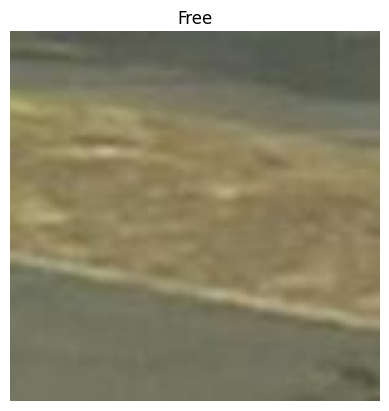

1/1 [==============================] - 0s 68ms/step
Prediction for Copy of 20150708_0815_9.jpg: Free


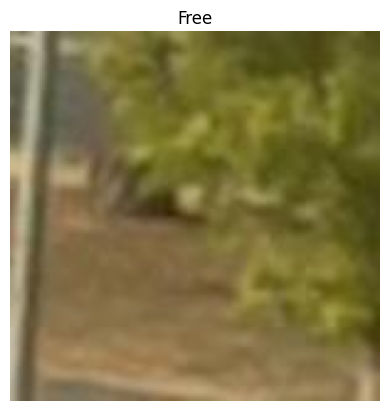

1/1 [==============================] - 0s 52ms/step
Prediction for Copy of 20150708_0830_39.jpg: Free


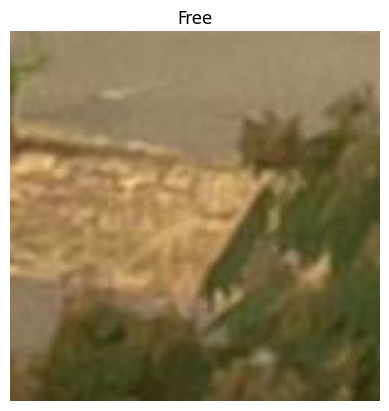

1/1 [==============================] - 0s 59ms/step
Prediction for Copy of 20150708_0905_46.jpg: Busy


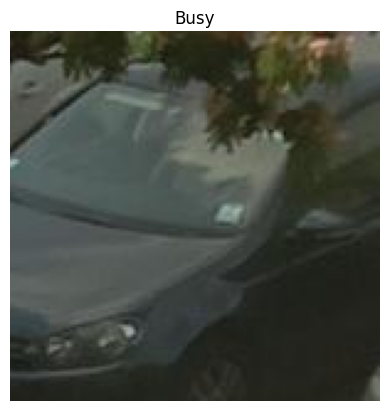

1/1 [==============================] - 0s 66ms/step
Prediction for Copy of 20150708_0825_6.jpg: Busy


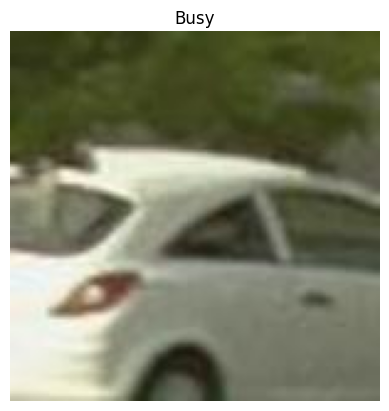

1/1 [==============================] - 0s 107ms/step
Prediction for Copy of 20150708_0935_16.jpg: Busy


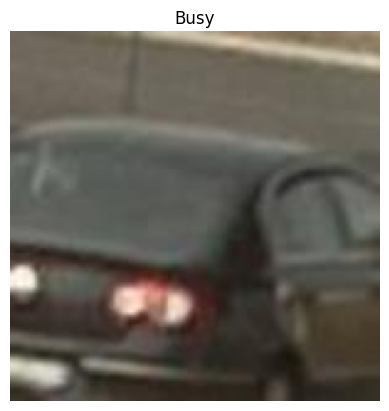

1/1 [==============================] - 0s 117ms/step
Prediction for Copy of REALLY BUSY.jpg: Busy


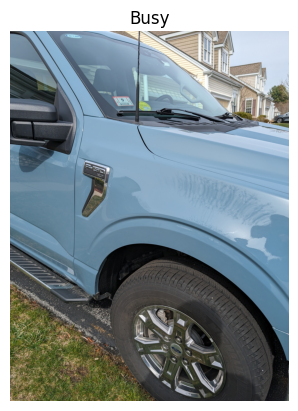

In [ ]:
# Define the path for the "Examples" folder
examples_dir = '/content/drive/My Drive/SCH-MGNT 661/parking/Examples'

# Load the saved model
model_path = '/content/drive/My Drive/SCH-MGNT 661/parking/parking_model.h5'
model = tf.keras.models.load_model(model_path)

# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(150, 150)):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    return img_array

# Function to predict image class with consistent threshold
def predict_image(image_path, model, threshold=0.5):
    processed_image = load_and_preprocess_image(image_path)
    predictions = model.predict(processed_image)
    if predictions[0] > threshold:
        return "Free"  # Corrected: Predict "Free" if probability is above threshold
    else:
        return "Busy"  # Corrected: Predict "Busy" if probability is below threshold

# Function to display the image along with prediction
def display_image_with_prediction(image_path, prediction):
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(prediction)
    plt.show()

# Iterate through images in the "Examples" folder and make predictions
for filename in os.listdir(examples_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif')):
        image_path = os.path.join(examples_dir, filename)
        prediction = predict_image(image_path, model)
        print(f"Prediction for {filename}: {prediction}")
        display_image_with_prediction(image_path, prediction)
